# Load Forecasting using weather data and extracted calendar features

In [135]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

%matplotlib inline

In [16]:
energy_df = pd.read_excel('Actuals.xlsx')

In [18]:
energy_df.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
0,2017-03-18 00:00:00,1.031472e+06,1012.48000,2.125,79.333333,16.764386,285.25,6.25375
1,2017-03-18 01:00:00,1.007206e+06,1011.61875,0.000,82.166667,15.729386,285.00,9.20500
2,2017-03-18 02:00:00,9.861084e+05,1010.72000,2.125,81.666667,15.816886,316.00,11.28375
3,2017-03-18 03:00:00,9.707610e+05,1011.37625,17.125,82.250000,15.919386,327.00,7.16875
4,2017-03-18 04:00:00,9.622584e+05,1011.50000,18.625,82.333333,15.769386,282.25,0.78000


In [55]:
year_list = []
month_list = []
for time in energy_df['Time']:
    year = str(time)[:4]
    month = str(time)[5:7]
    year_list.append(year)
    month_list.append(month)

In [56]:
months_unique = set(month_list)
months_unique

{'01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'}

In [57]:
energy_df['Time'].isna().sum()

0

In [85]:
def get_season(TimeSeries):
    
    season_list = []
    
    year_list = []
    month_list = []
    for time in TimeSeries:
        year = str(time)[:4]
        month = str(time)[5:7]
        year_list.append(year)
        month_list.append(month) 
       
    for m in month_list:
        if m=='01' or m=='02' or m=='12':
            season_list.append(0)   # Winter
        elif m=='03' or m=='04' or m=='05' or m=='06':
            season_list.append(1) #Spring-Summer
        elif m=='07' or m=='08' or m=='09':
            season_list.append(2) #Monsoon
        elif m=='10' or m=='11':
            season_list.append(3) #Autumn
            
    #season = pd.Series(season_list)
    return season_list

In [86]:
season = get_season(energy_df['Time'])

In [87]:
energy_df['Season'] = season

In [88]:
energy_df.head(10)

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Season
0,2017-03-18 00:00:00,1.031472e+06,1012.48000,2.125,79.333333,16.764386,285.250,6.25375,1
1,2017-03-18 01:00:00,1.007206e+06,1011.61875,0.000,82.166667,15.729386,285.000,9.20500,1
2,2017-03-18 02:00:00,9.861084e+05,1010.72000,2.125,81.666667,15.816886,316.000,11.28375,1
3,2017-03-18 03:00:00,9.707610e+05,1011.37625,17.125,82.250000,15.919386,327.000,7.16875,1
4,2017-03-18 04:00:00,9.622584e+05,1011.50000,18.625,82.333333,15.769386,282.250,0.78000,1
5,2017-03-18 05:00:00,9.638479e+05,1011.03875,21.250,80.083333,15.711886,162.750,0.45125,1
6,2017-03-18 06:00:00,9.716622e+05,1011.44500,40.875,79.166667,15.374386,260.750,3.18500,1
7,2017-03-18 07:00:00,9.986675e+05,1011.50000,44.000,81.416667,13.504386,231.750,3.98500,1
8,2017-03-18 08:00:00,1.060602e+06,1011.86875,44.000,77.416667,15.831886,268.375,5.28125,1
9,2017-03-18 09:00:00,1.141663e+06,1013.41000,44.000,74.333333,19.369386,289.375,7.13375,1


In [89]:
energy_df.corr()

,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Season
Load (kW),1.000000,-0.050032,0.016469,-0.168171,0.557408,0.328756,0.457311,0.083802
Pressure_kpa,-0.050032,1.000000,-0.654851,-0.627756,-0.153052,-0.211696,-0.381218,-0.207117
Cloud Cover (%),0.016469,-0.654851,1.000000,0.667652,-0.059279,0.030966,0.240750,0.280370
Humidity (%),-0.168171,-0.627756,0.667652,1.000000,-0.250388,0.017097,0.029974,0.235822
Temperature (C),0.557408,-0.153052,-0.059279,-0.250388,1.000000,0.373802,0.411038,0.180383
Wind Direction (deg),0.328756,-0.211696,0.030966,0.017097,0.373802,1.000000,0.450958,-0.112832
Wind Speed (kmh),0.457311,-0.381218,0.240750,0.029974,0.411038,0.450958,1.000000,-0.002445
Season,0.083802,-0.207117,0.280370,0.235822,0.180383,-0.112832,-0.002445,1.000000


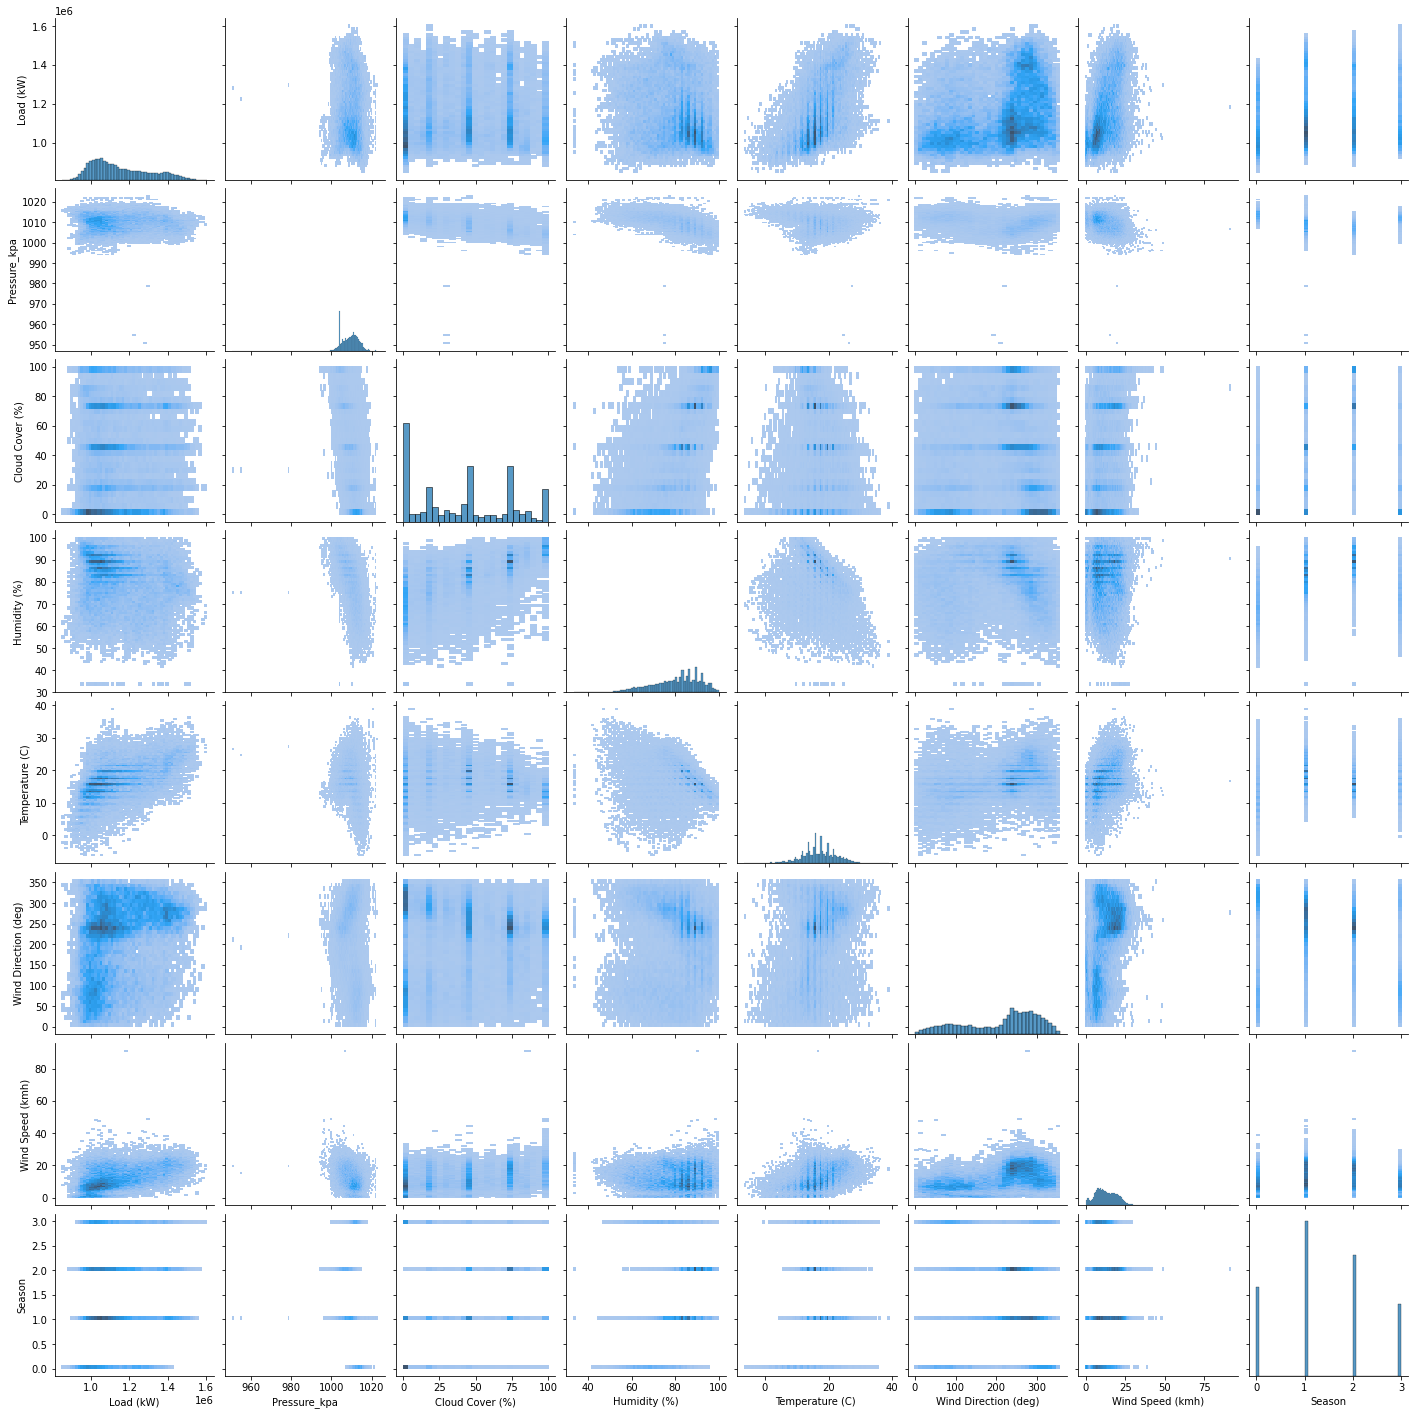

In [96]:
sns.pairplot(energy_df, kind = 'hist')

<BarContainer object of 4 artists>

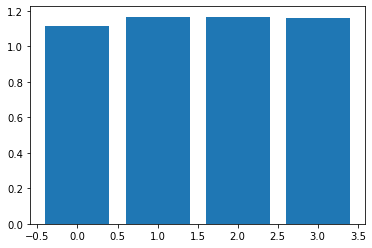

In [98]:
energy_df_grouped = energy_df.groupby(['Season']).mean()
#energy_df_grouped['Season_to_plot'] = energy_df_grouped['Season']
plt.bar(energy_df_grouped.index, energy_df_grouped['Load (kW)'])

In [67]:
hour_list = []
for time in energy_df['Time']:
    hour = str(time)[11:13]
    hour_list.append(hour)
hour_list

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',

In [110]:
energy_df['Hour of day'] = [int(hour) for hour in hour_list]
#energy_df.drop(columns = ['hour'])

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Season,Hour of day
0,2017-03-18 00:00:00,1.031472e+06,1012.48000,2.125,79.333333,16.764386,285.250000,6.253750,1,0
1,2017-03-18 01:00:00,1.007206e+06,1011.61875,0.000,82.166667,15.729386,285.000000,9.205000,1,1
2,2017-03-18 02:00:00,9.861084e+05,1010.72000,2.125,81.666667,15.816886,316.000000,11.283750,1,2
3,2017-03-18 03:00:00,9.707610e+05,1011.37625,17.125,82.250000,15.919386,327.000000,7.168750,1,3
4,2017-03-18 04:00:00,9.622584e+05,1011.50000,18.625,82.333333,15.769386,282.250000,0.780000,1,4
...,...,...,...,...,...,...,...,...,...,...
31907,2020-11-06 11:00:00,1.242830e+06,1012.85000,45.625,68.166667,21.299386,335.250000,8.280000,3,11
31908,2020-11-06 12:00:00,1.239480e+06,1011.75000,48.875,67.166667,22.419386,261.250000,11.466250,3,12
31909,2020-11-06 13:00:00,1.234773e+06,1010.93750,55.375,67.583333,22.971886,296.250000,14.507500,3,13
31910,2020-11-06 14:00:00,1.240140e+06,1010.25000,55.000,66.250000,24.314386,289.000000,16.397500,3,14


In [114]:
energy_df.head()
energy_df = energy_df.drop(columns = ['hour'])

In [116]:
energy_df.corr()

,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Season,Hour of day
Load (kW),1.000000,-0.050032,0.016469,-0.168171,0.557408,0.328756,0.457311,0.083802,0.360247
Pressure_kpa,-0.050032,1.000000,-0.654851,-0.627756,-0.153052,-0.211696,-0.381218,-0.207117,-0.025647
Cloud Cover (%),0.016469,-0.654851,1.000000,0.667652,-0.059279,0.030966,0.240750,0.280370,-0.030308
Humidity (%),-0.168171,-0.627756,0.667652,1.000000,-0.250388,0.017097,0.029974,0.235822,-0.141293
Temperature (C),0.557408,-0.153052,-0.059279,-0.250388,1.000000,0.373802,0.411038,0.180383,0.287277
Wind Direction (deg),0.328756,-0.211696,0.030966,0.017097,0.373802,1.000000,0.450958,-0.112832,0.303999
Wind Speed (kmh),0.457311,-0.381218,0.240750,0.029974,0.411038,0.450958,1.000000,-0.002445,0.279538
Season,0.083802,-0.207117,0.280370,0.235822,0.180383,-0.112832,-0.002445,1.000000,-0.000468
Hour of day,0.360247,-0.025647,-0.030308,-0.141293,0.287277,0.303999,0.279538,-0.000468,1.000000


In [117]:
energy_df.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Season,Hour of day
0,2017-03-18 00:00:00,1.031472e+06,1012.48000,2.125,79.333333,16.764386,285.25,6.25375,1,0
1,2017-03-18 01:00:00,1.007206e+06,1011.61875,0.000,82.166667,15.729386,285.00,9.20500,1,1
2,2017-03-18 02:00:00,9.861084e+05,1010.72000,2.125,81.666667,15.816886,316.00,11.28375,1,2
3,2017-03-18 03:00:00,9.707610e+05,1011.37625,17.125,82.250000,15.919386,327.00,7.16875,1,3
4,2017-03-18 04:00:00,9.622584e+05,1011.50000,18.625,82.333333,15.769386,282.25,0.78000,1,4


In [118]:
day_list = []
for time in energy_df['Time']:
    day = time.weekday()
    day_list.append(day)
energy_df['Day of Week'] = day_list

In [119]:
energy_df.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Season,Hour of day,Day of Week
0,2017-03-18 00:00:00,1.031472e+06,1012.48000,2.125,79.333333,16.764386,285.25,6.25375,1,0,5
1,2017-03-18 01:00:00,1.007206e+06,1011.61875,0.000,82.166667,15.729386,285.00,9.20500,1,1,5
2,2017-03-18 02:00:00,9.861084e+05,1010.72000,2.125,81.666667,15.816886,316.00,11.28375,1,2,5
3,2017-03-18 03:00:00,9.707610e+05,1011.37625,17.125,82.250000,15.919386,327.00,7.16875,1,3,5
4,2017-03-18 04:00:00,9.622584e+05,1011.50000,18.625,82.333333,15.769386,282.25,0.78000,1,4,5


In [120]:
energy_df.corr()

,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Season,Hour of day,Day of Week
Load (kW),1.000000,-0.050032,0.016469,-0.168171,0.557408,0.328756,0.457311,0.083802,0.360247,-0.230993
Pressure_kpa,-0.050032,1.000000,-0.654851,-0.627756,-0.153052,-0.211696,-0.381218,-0.207117,-0.025647,0.003797
Cloud Cover (%),0.016469,-0.654851,1.000000,0.667652,-0.059279,0.030966,0.240750,0.280370,-0.030308,-0.006812
Humidity (%),-0.168171,-0.627756,0.667652,1.000000,-0.250388,0.017097,0.029974,0.235822,-0.141293,-0.014875
Temperature (C),0.557408,-0.153052,-0.059279,-0.250388,1.000000,0.373802,0.411038,0.180383,0.287277,-0.010920
Wind Direction (deg),0.328756,-0.211696,0.030966,0.017097,0.373802,1.000000,0.450958,-0.112832,0.303999,-0.010475
Wind Speed (kmh),0.457311,-0.381218,0.240750,0.029974,0.411038,0.450958,1.000000,-0.002445,0.279538,0.019405
Season,0.083802,-0.207117,0.280370,0.235822,0.180383,-0.112832,-0.002445,1.000000,-0.000468,-0.004763
Hour of day,0.360247,-0.025647,-0.030308,-0.141293,0.287277,0.303999,0.279538,-0.000468,1.000000,-0.000145
Day of Week,-0.230993,0.003797,-0.006812,-0.014875,-0.010920,-0.010475,0.019405,-0.004763,-0.000145,1.000000


In [123]:
energy_df['Is Weekend'] = [day == 5 or day == 6 for day in energy_df['Day of Week']]

In [124]:
energy_df.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Season,Hour of day,Day of Week,Is Weekend
0,2017-03-18 00:00:00,1.031472e+06,1012.48000,2.125,79.333333,16.764386,285.25,6.25375,1,0,5,True
1,2017-03-18 01:00:00,1.007206e+06,1011.61875,0.000,82.166667,15.729386,285.00,9.20500,1,1,5,True
2,2017-03-18 02:00:00,9.861084e+05,1010.72000,2.125,81.666667,15.816886,316.00,11.28375,1,2,5,True
3,2017-03-18 03:00:00,9.707610e+05,1011.37625,17.125,82.250000,15.919386,327.00,7.16875,1,3,5,True
4,2017-03-18 04:00:00,9.622584e+05,1011.50000,18.625,82.333333,15.769386,282.25,0.78000,1,4,5,True


In [127]:
clean_weekend = []
for b in energy_df['Is Weekend']:
    if b==True:
        clean_weekend.append(1)
    elif b==False:
        clean_weekend.append(0)
energy_df['Is Weekend Clean'] = clean_weekend
        

In [128]:
energy_df.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Season,Hour of day,Day of Week,Is Weekend,Is Weekend Clean
0,2017-03-18 00:00:00,1.031472e+06,1012.48000,2.125,79.333333,16.764386,285.25,6.25375,1,0,5,True,1
1,2017-03-18 01:00:00,1.007206e+06,1011.61875,0.000,82.166667,15.729386,285.00,9.20500,1,1,5,True,1
2,2017-03-18 02:00:00,9.861084e+05,1010.72000,2.125,81.666667,15.816886,316.00,11.28375,1,2,5,True,1
3,2017-03-18 03:00:00,9.707610e+05,1011.37625,17.125,82.250000,15.919386,327.00,7.16875,1,3,5,True,1
4,2017-03-18 04:00:00,9.622584e+05,1011.50000,18.625,82.333333,15.769386,282.25,0.78000,1,4,5,True,1


In [131]:
energy_df = energy_df.drop(columns=['Is Weekend'])

In [132]:
energy_df.corr()

,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Season,Hour of day,Day of Week,Is Weekend Clean
Load (kW),1.000000,-0.050032,0.016469,-0.168171,0.557408,0.328756,0.457311,0.083802,0.360247,-0.230993,-0.286533
Pressure_kpa,-0.050032,1.000000,-0.654851,-0.627756,-0.153052,-0.211696,-0.381218,-0.207117,-0.025647,0.003797,0.008512
Cloud Cover (%),0.016469,-0.654851,1.000000,0.667652,-0.059279,0.030966,0.240750,0.280370,-0.030308,-0.006812,-0.012627
Humidity (%),-0.168171,-0.627756,0.667652,1.000000,-0.250388,0.017097,0.029974,0.235822,-0.141293,-0.014875,-0.012303
Temperature (C),0.557408,-0.153052,-0.059279,-0.250388,1.000000,0.373802,0.411038,0.180383,0.287277,-0.010920,0.002124
Wind Direction (deg),0.328756,-0.211696,0.030966,0.017097,0.373802,1.000000,0.450958,-0.112832,0.303999,-0.010475,-0.013885
Wind Speed (kmh),0.457311,-0.381218,0.240750,0.029974,0.411038,0.450958,1.000000,-0.002445,0.279538,0.019405,0.008835
Season,0.083802,-0.207117,0.280370,0.235822,0.180383,-0.112832,-0.002445,1.000000,-0.000468,-0.004763,-0.008879
Hour of day,0.360247,-0.025647,-0.030308,-0.141293,0.287277,0.303999,0.279538,-0.000468,1.000000,-0.000145,0.000183
Day of Week,-0.230993,0.003797,-0.006812,-0.014875,-0.010920,-0.010475,0.019405,-0.004763,-0.000145,1.000000,0.790713


In [134]:
energy_df.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Season,Hour of day,Day of Week,Is Weekend Clean
0,2017-03-18 00:00:00,1.031472e+06,1012.48000,2.125,79.333333,16.764386,285.25,6.25375,1,0,5,1
1,2017-03-18 01:00:00,1.007206e+06,1011.61875,0.000,82.166667,15.729386,285.00,9.20500,1,1,5,1
2,2017-03-18 02:00:00,9.861084e+05,1010.72000,2.125,81.666667,15.816886,316.00,11.28375,1,2,5,1
3,2017-03-18 03:00:00,9.707610e+05,1011.37625,17.125,82.250000,15.919386,327.00,7.16875,1,3,5,1
4,2017-03-18 04:00:00,9.622584e+05,1011.50000,18.625,82.333333,15.769386,282.25,0.78000,1,4,5,1


In [138]:
profile = pp.ProfileReport(energy_df, minimal=True, explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]